In [1]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
# this requires clean.mplstyle
plt.style.use('clean')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import tools.visual as viz
import tools.solve as sol

### Globals

In [5]:
xlim = -2, 2

### Test Functions

In [6]:
def linear(x):
    return x

In [7]:
def quadratic(x):
    return x**2 - 4*x

In [8]:
def cubic(x):
    return x**3 - x - 1

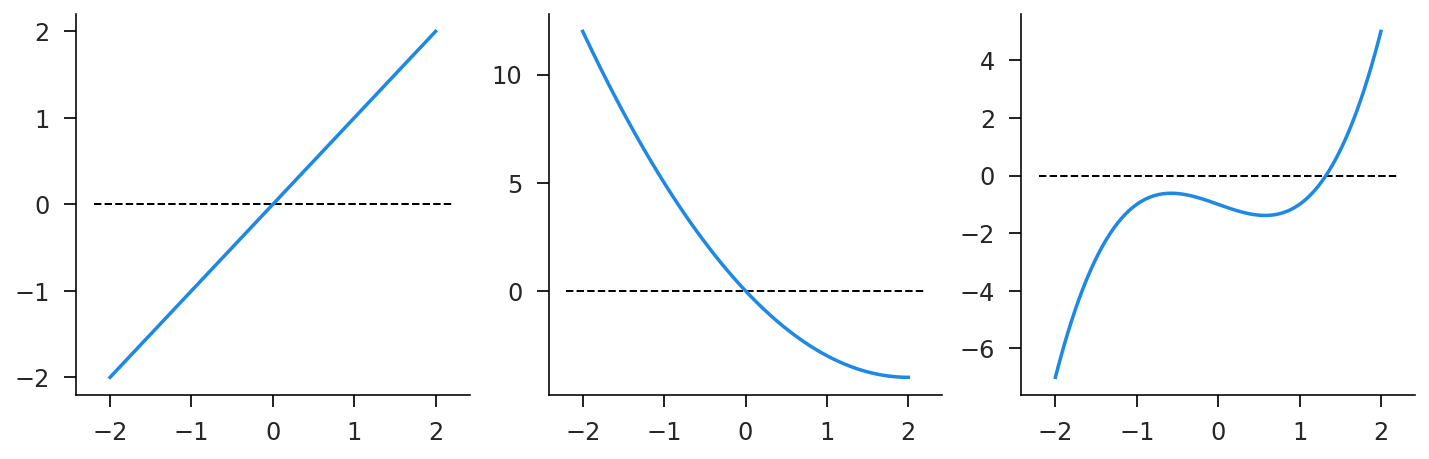

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3.5))
viz.plot(linear, *xlim, ax=axs[0])
viz.plot(quadratic, *xlim, ax=axs[1])
viz.plot(cubic, *xlim, ax=axs[2])

### Solving Methods

Here we just define the function that updates from one iteration to the next. Note that `newton` uses a finite difference approximation for the derivative.

In [10]:
def bisect(f, ab):
    a, b = ab
    c = 0.5*(a+b)
    fa, fb, fc = f(a), f(b), f(c)
    if fa*fc <= 0:
        b = c
    else:
        a = c
    return a, b

In [11]:
def secant(f, ab):
    a, b = ab
    fa, fb = f(a), f(b)
    m = (fb-fa)/(b-a)
    c = b - fb/m
    fc = f(c)
    return b, c

In [12]:
def newton(f, x, ϵ=1e-8):
    xϵ = x + ϵ
    fx, fϵ = f(x), f(xϵ)
    fp = (fϵ-fx)/ϵ
    xp = x - fx/fp
    return xp

These are all run with initial states the converge!

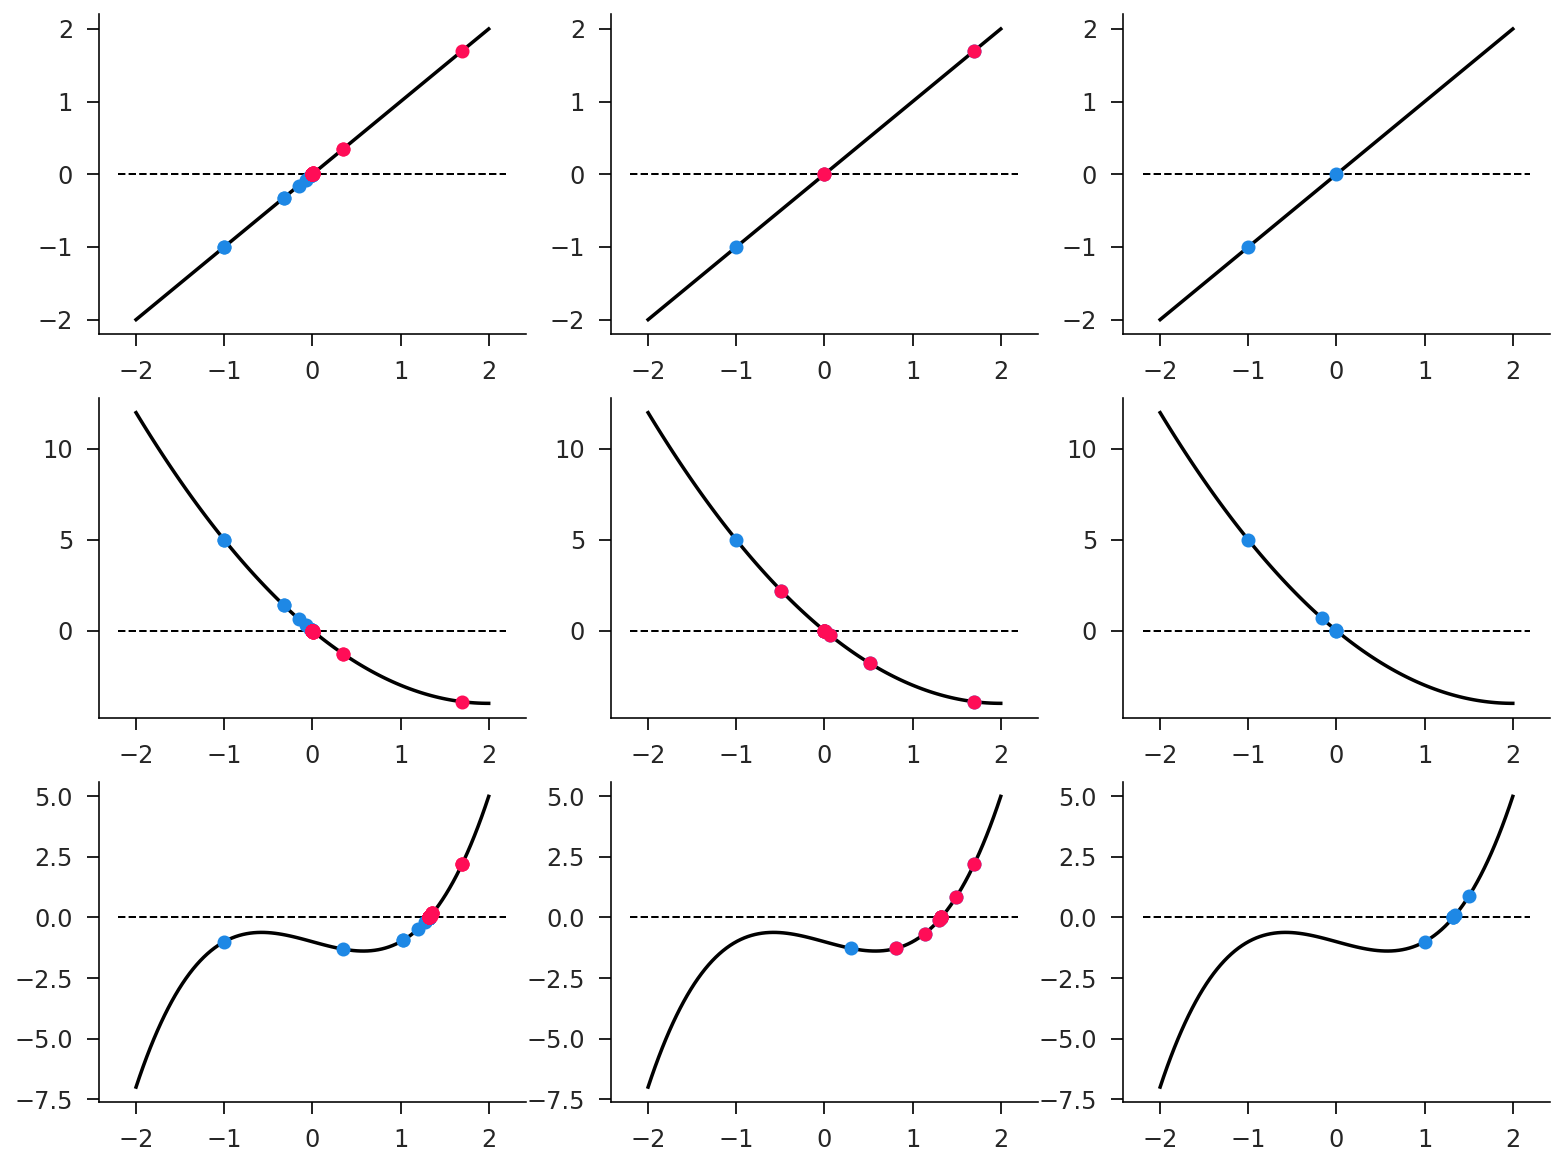

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))
sol.solve_univar(bisect, linear, (-1, 1.7), xlim, ax=axs[0][0])
sol.solve_univar(secant, linear, (-1, 1.7), xlim, ax=axs[0][1])
sol.solve_univar(newton, linear, -1, xlim, ax=axs[0][2])
sol.solve_univar(bisect, quadratic, (-1, 1.7), xlim, ax=axs[1][0])
sol.solve_univar(secant, quadratic, (-1, 1.7), xlim, ax=axs[1][1])
sol.solve_univar(newton, quadratic, -1, xlim, ax=axs[1][2])
sol.solve_univar(bisect, cubic, (-1, 1.7), xlim, ax=axs[2][0])
sol.solve_univar(secant, cubic, (0.3, 1.7), xlim, ax=axs[2][1])
sol.solve_univar(newton, cubic, 1, xlim, ax=axs[2][2]);

For certain initial states, `secant` and `newton` go for some wild rides, but they usually seem to converge.

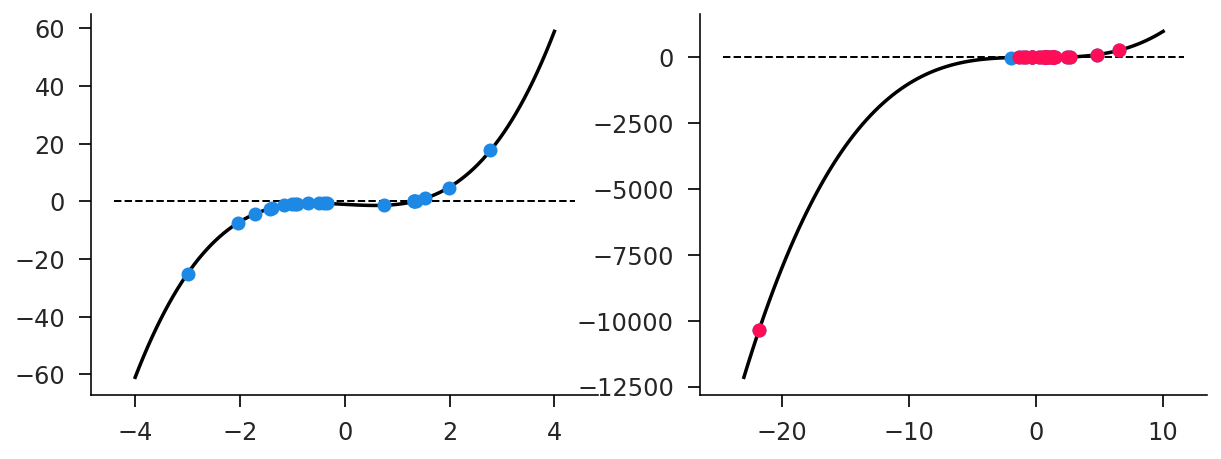

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3.5))
sol.solve_univar(newton, cubic, -1, (-4, 4), ax=axs[0])
sol.solve_univar(secant, cubic, (-2, -1), (-23, 10), ax=axs[1]);

### Multivariate Solving

I'm going to use the builtin `scipy` methods here, rather than rolling my own. Because the functions defined above will also operate pointwise on vectors, we could pass them to solve diagonal systems. But that's essentially equivalent to solving $N$ unidimensional system. Below is a simple N-dimensional system of equations implementing
$$ f(x,y) = \left[\begin{array}{c}
\prod_i x_i \\
1 - \sum_i x_i^2
\end{array}\right] = 0 $$
For $N=2$, this has solutions $x \in \{(0,1),(0,-1),(1,0),(-1,0)\}$. For higher dimensions, it may have a continuum of solutions, but we'll focus on the two dimensional case here for ease of  

In [15]:
def multifun(x):
    return np.prod(x), 1 - np.sum(x**2)

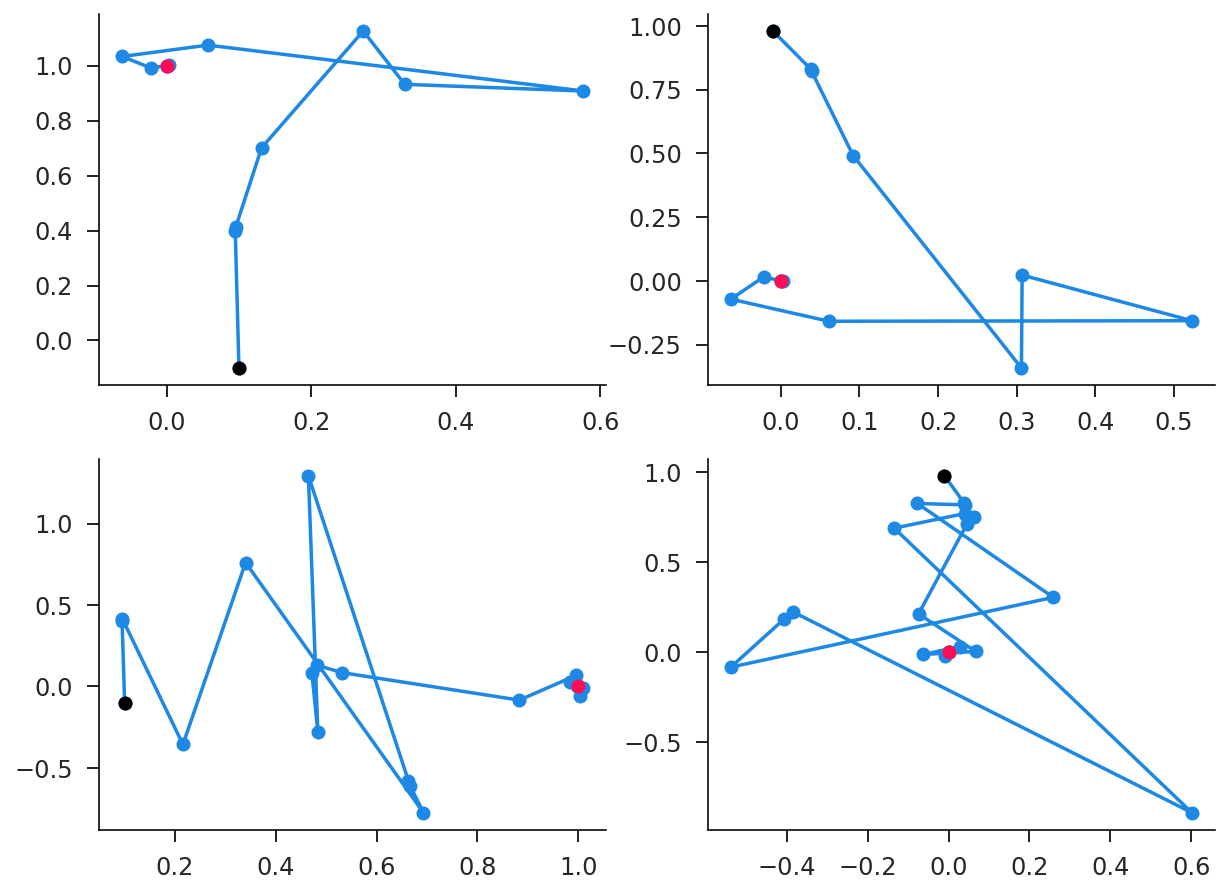

In [122]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7.5))
sol.solve_multivar(multifun, (0.1, -0.1), 'broyden1', axs=axs[0])
sol.solve_multivar(multifun, (0.1, -0.1), 'anderson', axs=axs[1]);

### Optimization Methods

In [24]:
def basin1(x):
    return x**2

In [153]:
def valleys1(x):
    return x**4 - 3*x**2 - x + 2

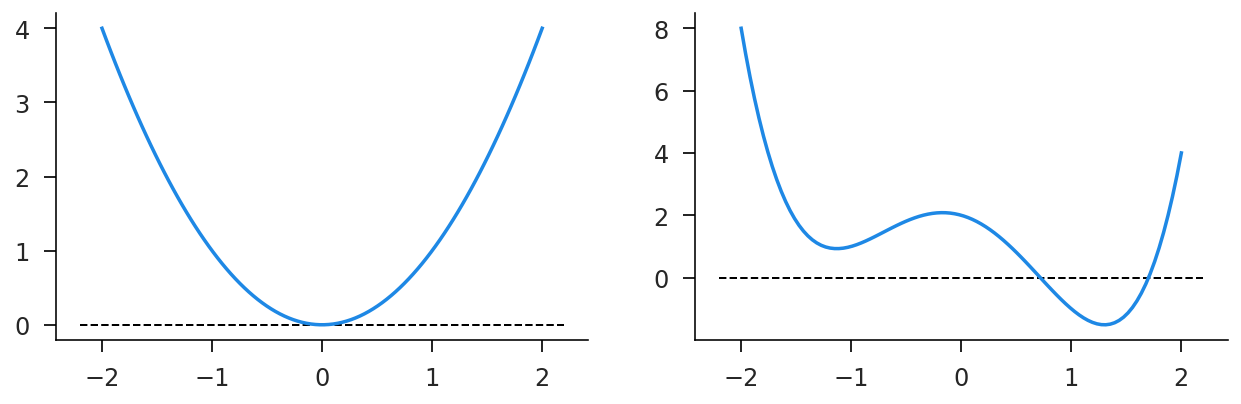

In [154]:
fig, axs = plt.subplots(ncols=2, figsize=(10.5, 3))
viz.plot(basin1, -2, 2, ax=axs[0])
viz.plot(valleys1, -2, 2, ax=axs[1])

In [155]:
phi = sp.constants.golden
def golden(f, ab):
    a, b = ab
    step = (b-a)/phi
    c = b - step
    d = a + step
    if f(c) < f(d):
        b = d
    else:
        a = c
    return a, b

In [156]:
def gradient(f, x, Δ=0.1, ϵ=1e-8):
    xϵ = x + ϵ
    fx, fϵ = f(x), f(xϵ)
    fp = (fϵ-fx)/ϵ
    xp = x - Δ*fp
    return xp

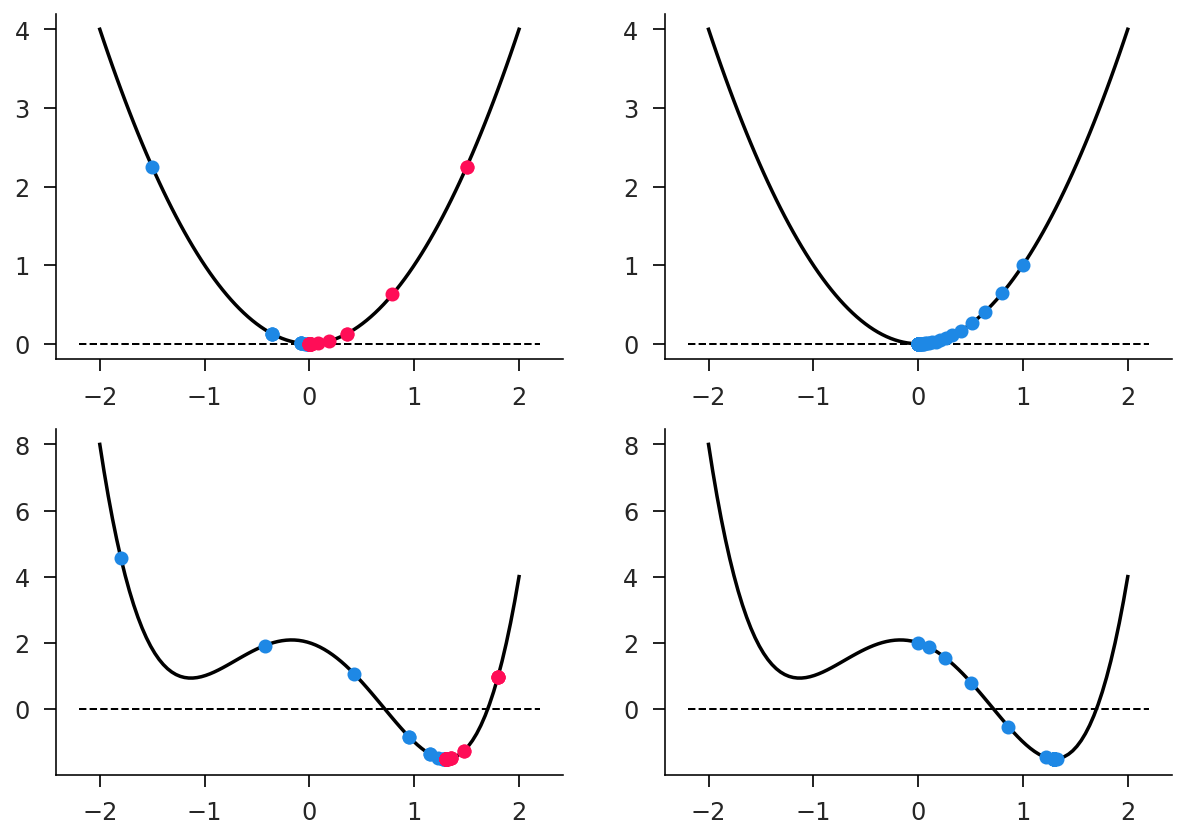

In [157]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
sol.optim_univar(golden, basin1, (-1.5, 1.5), xlim, ax=axs[0][0])
sol.optim_univar(gradient, basin1, 1, xlim, ax=axs[0][1])
sol.optim_univar(golden, valleys1, (-1.8, 1.8), xlim, ax=axs[1][0])
sol.optim_univar(gradient, valleys1, 0, xlim, ax=axs[1][1])

### Multivariate Optimization

Check out this list for some real spoilers: https://en.wikipedia.org/wiki/Test_functions_for_optimization

In [159]:
def basinN(x):
    return np.sum(basin1(x))

In [162]:
def valleysN(x):
    return np.sum(valleys1(x))

In [186]:
def himmelblau(xy):
    x, y = xy
    return (x**2+y-11)**2 + (x+y**2-7)**2

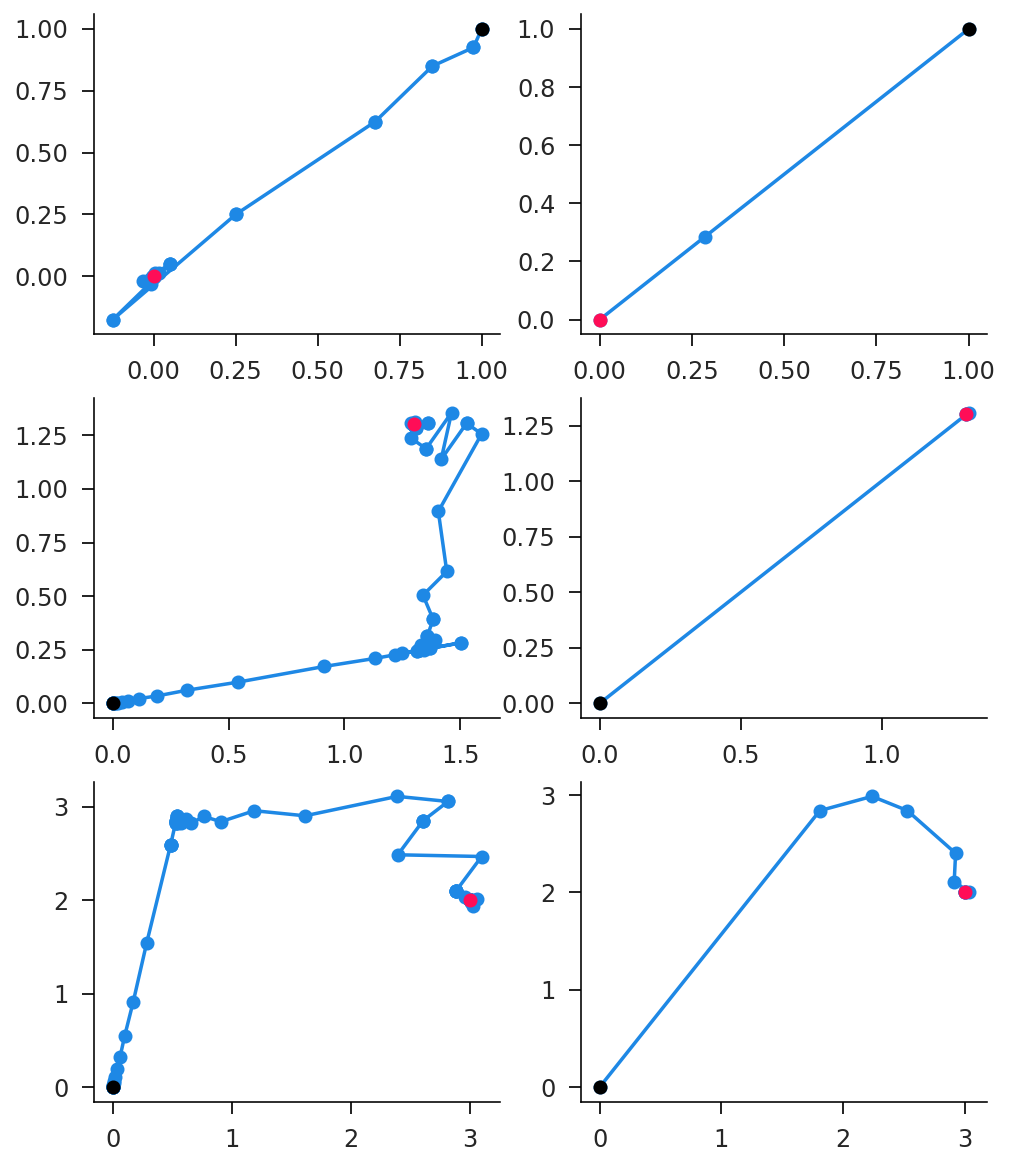

In [189]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
sol.optim_multivar(basinN, (1, 1), method='nelder-mead', ax=axs[0][0])
sol.optim_multivar(basinN, (1, 1), method='bfgs', ax=axs[0][1])
sol.optim_multivar(valleysN, (0, 0), method='nelder-mead', ax=axs[1][0])
sol.optim_multivar(valleysN, (0, 0), method='bfgs', ax=axs[1][1])
sol.optim_multivar(himmelblau, (0, 0), method='nelder-mead', ax=axs[2][0])
sol.optim_multivar(himmelblau, (0, 0), method='bfgs', ax=axs[2][1]);